In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv("ToyotaCorolla.csv")

In [17]:
#Replacing Missing Values with NaN

df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [19]:
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [21]:
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [37]:
df.dtypes

Price         int64
Age           int64
KM            int64
FuelType     object
HP            int64
MetColor      int64
Automatic     int64
CC            int64
Doors         int64
Weight        int64
dtype: object

In [39]:
label_encoder = LabelEncoder()

In [43]:
df['FuelType'] = label_encoder.fit_transform(df['FuelType'])

In [45]:
X = df.drop(['Price'], axis = 1)
y = df['Price']

In [47]:
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
rf_regression = RandomForestRegressor()
rf_regression.fit(X_train,y_train)


RandomForestRegressor()

In [57]:
y_pred = rf_regression.predict(X_test)

In [61]:
y_train_pred = rf_regression.predict(X_train)
y_test_pred = rf_regression.predict(X_test)

In [75]:
#Evaluate the model on train set

mae_train = metrics.mean_absolute_error(y_train,y_train_pred)
mse_train = metrics.mean_squared_error(y_train,y_train_pred)
r2_train = rf_regression.score(X_train,y_train)

#Evaluate the model on test set
mae_test = metrics.mean_absolute_error(y_test,y_test_pred)
mse_test = metrics.mean_squared_error(y_test,y_test_pred)
r2_test = rf_regression.score(X_test,y_test)

#printing both
print('*' * 50)
print("Training set Performance")

print(f"mean absolute error: {mae_train}")
print(f"mean squarred error: {mse_train}")
print(f"R-score: {r2_train}")
print('*'*50)


print("\nTesting Set Performance")
print(f"mean absolute error: {mae_test}")
print(f"mean squarred error: {mse_test}")
print(f"R-Score: {r2_test}")

if r2_train > r2_test:
    print("\nModel may be overfitting")
elif r2_train < 0.5 and r2_test < 0.5:
    print("\nModel may be underfitting")
else:
    print("\nModel is performing well")


**************************************************
Training set Performance
mean absolute error: 308.09253318400533
mean squarred error: 168840.00206611934
R-score: 0.9878642916944173
**************************************************

Testing Set Performance
mean absolute error: 834.32125
mean squarred error: 1147674.6676340278
R-Score: 0.8859962822211691

Model may be overfitting


In [87]:
importance = rf_regression.feature_importances_

importance_df = pd.DataFrame({'Feature' : X.columns, 'Importance':importance})
print(importance_df.sort_values(by='Importance', ascending=False))


     Feature  Importance
0        Age    0.830152
8     Weight    0.070638
1         KM    0.063731
3         HP    0.020625
7      Doors    0.004509
4   MetColor    0.004253
6         CC    0.003878
2   FuelType    0.001336
5  Automatic    0.000878


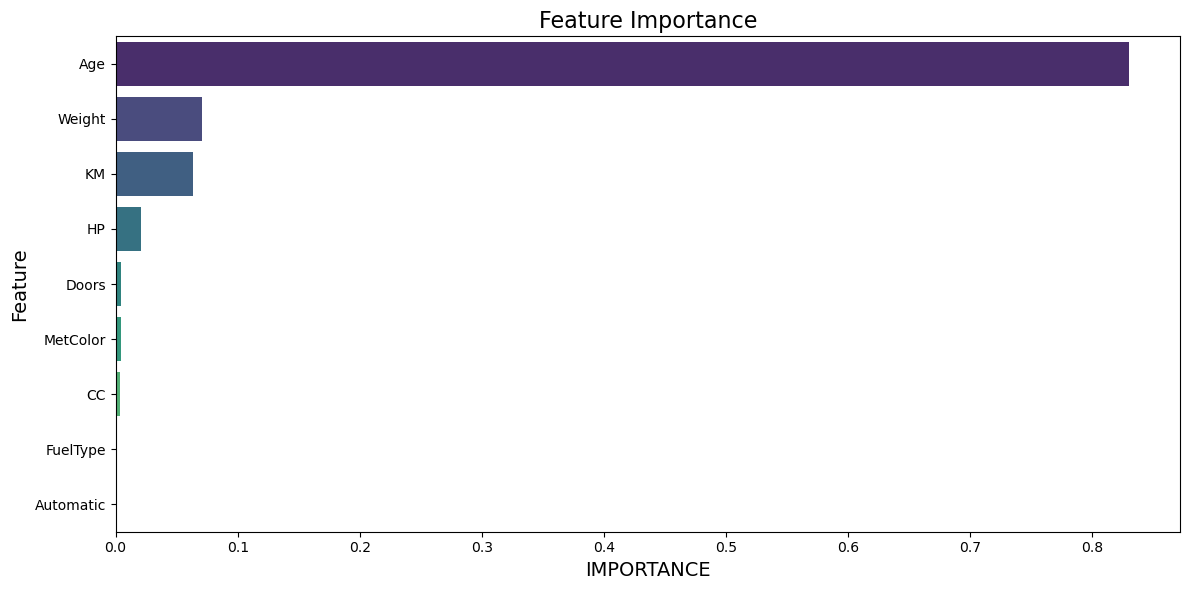

In [97]:
importance_df = importance_df.sort_values(by='Importance',ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')

plt.title("Feature Importance", fontsize=16)
plt.xlabel("IMPORTANCE", fontsize=14)
plt.ylabel("Feature", fontsize=14)

plt.tight_layout()
plt.show()

In [99]:
X_reduced = df.drop(['Automatic', 'MetColor', 'FuelType','CC'], axis=1)



In [107]:
#Parameter tunning with GridSearchCV

param_grid = {
    'n_estimators':[50,100,200],
    'max_depth':[2,3,5,10,15],
    'min_samples_split':[2,3,5,10],
    'min_samples_leaf':[2,4],
    'max_features':['sqrt', 'log2']
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,n_jobs=-1,verbose=2,scoring='r2')

grid_search.fit(X_train,y_train)

print(f"Best parameter: {grid_search.best_params_}")
print(f"Best R Score from CV: {grid_search.best_score_}")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameter: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}
Best R Score from CV: 0.9099922714308427


In [119]:
best_rf = grid_search.best_estimator_

y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

mae_train = metrics.mean_absolute_error(y_train,y_train_pred)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

#print all
print("Training set")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"R2: {r2_train}")

print("\nTesting set")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"R2 : {r2_test}")

#Analysis

if r2_train > r2_test:
    print('\nModel May be overfitting')
elif r2_train < 0.5 and r2_test < 0.5:
    print("\nModel may be Underfitting")
else:
    print("\nModel is Performing Well")
    

Training set
MAE: 609.6935335524895
MSE: 648677.1988541407
R2: 0.9533750463548708

Testing set
MAE: 778.2971428192645
MSE: 991713.1457868317
R2 : 0.9014886458869797

Model May be overfitting
